In [22]:
# Import dependencies and API key

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
import matplotlib.pyplot as plt

from datetime import datetime
from citipy import citipy
from scipy.stats import linregress


from config import weather_api_key

In [ ]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [ ]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [ ]:
# Create a list to hold the cities

cities = []

# Find the nearest city for each set of coordinates

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Add the city to the cities list if it's not already in there
    if city not in cities:
        cities.append(city)

# Print the city count

cities[35]

In [ ]:
# Create starting URL for API call
# Format from OpenWeather:
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [ ]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the log

print("Beginning data retrieval               ")
print("---------------------------------------")

# Create counters

record_count = 1
set_count = 1

In [ ]:
test_url = url + "&q=" + "athabasca"

In [ ]:
test_weather = requests.get(test_url).json()

test_lat = test_weather["coord"]["lat"]
test_max = test_weather["main"]["temp_max"]

In [ ]:
test_date = datetime.utcfromtimestamp(
    test_weather["dt"]).strftime("%Y-%M-%D %H:%M:%S")

In [ ]:
# Loop through all our cities
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    # If i is at least 50 and is divisible by 50, then we have 
    # started a new set.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #After looping through 50 cities, we need to pause for a 
        # minute to avoid making too many API calls/minute.
        time.sleep(60)
        
    # Create endpoint URL for a city
    # If a city name has a space, we need to replace it with a 
    # plus sign in the URl
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URl, the record and set numbers, and the city
    print(
        f"Processing record {record_count} of set {set_count} | {city}"
    )

    # Add one to the record count
    record_count += 1

    # Run an API request for each city
    try:
        #Retrieve data; parse JSON
        city_weather = requests.get(city_url).json()

        #Get the data points we need
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%M-%D %H:%M:%S")

        # Append the data to the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
len(city_data)

In [ ]:
# Save the data in a dataframe

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
# Change order of dataframe columns

new_col_order = [
    "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [ ]:
city_data_df = city_data_df[new_col_order]

In [ ]:
city_data_df.head()

In [ ]:
# Create the output CSV file

output_data_file = "weather_data/cities.csv"

# Export the city_data into the csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [2]:
# Import the CSV into a new dataframe so we don't have to rerun
# all the above code (except for importing dependencies)

city_weather_df = pd.read_csv("weather_data/cities.csv")

In [3]:
city_weather_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bambous Virieux,MU,2022-20-09/19/22 15:20:51,-20.3428,57.7575,72.21,78,75,10.36
1,1,Phan Thiet,VN,2022-16-09/19/22 15:16:55,10.9333,108.1000,79.18,81,79,8.46
2,2,Avarua,CK,2022-20-09/19/22 15:20:29,-21.2078,-159.7750,73.45,83,100,2.30
3,3,Kushima,JP,2022-20-09/19/22 15:20:55,31.4583,131.2333,71.20,89,100,9.19
4,4,Mount Isa,AU,2022-20-09/19/22 15:20:55,-20.7333,139.5000,73.17,46,30,0.00


In [4]:
# Get relevant fields from the dataframe for plotting

lats = city_weather_df["Lat"]
max_temps = city_weather_df["Max Temp"]
humidity = city_weather_df["Humidity"]
cloudiness = city_weather_df["Cloudiness"]
wind_speed = city_weather_df["Wind Speed"]

In [7]:
import time

# Get today's date in seconds since 1/1/1970

today = time.time()

# or in a format that makes more sense

today = time.strftime("%x")

today

'09/19/22'

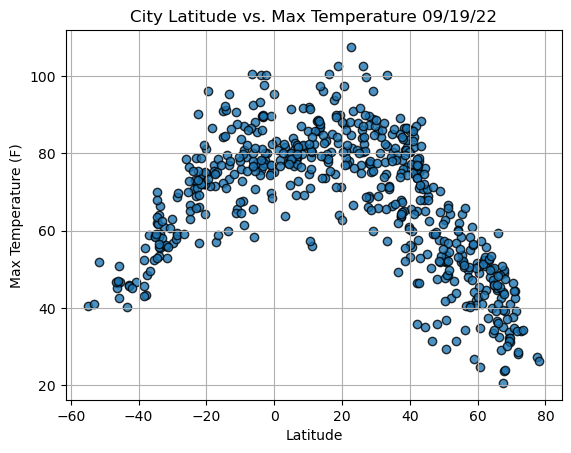

In [12]:
# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

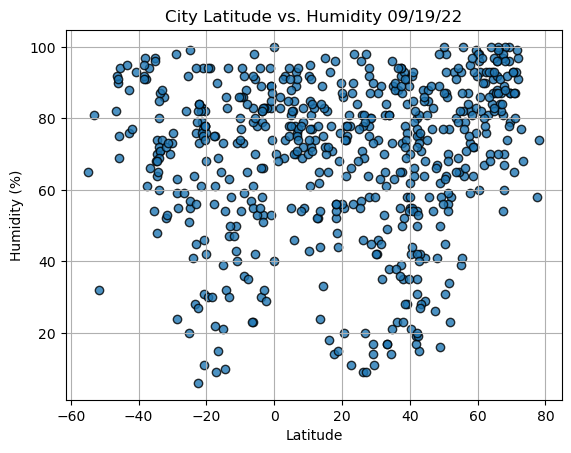

In [13]:
# Build the scatter plot for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

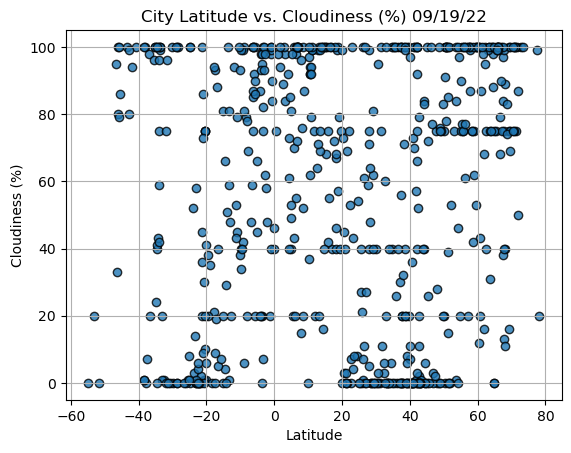

In [14]:
# Build the scatter plot for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

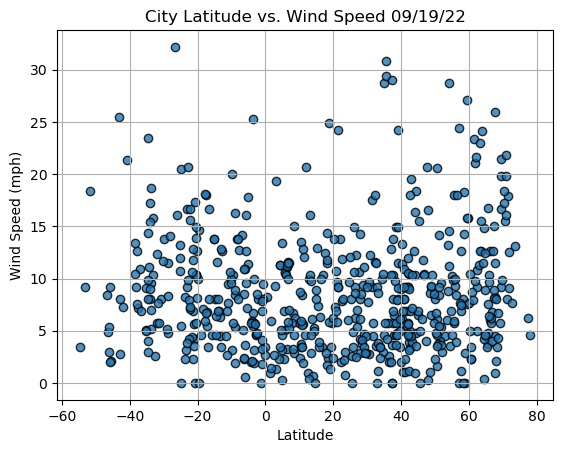

In [15]:
# Build the scatter plot for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [17]:
# Create an equal number of latitudes and temperatures.
lats = [
    42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5
]

temps = [
    80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0
]

In [19]:
# Perform linear regression

(slope, intercept, r_value, p_value, std_err) = linregress(
    lats, temps)

# Get the equation of the line

line_eq = "y = " + str(
    round(slope,2)) + "x + " + str(
    round(intercept,2))

print(line_eq)

print(f"The p-value is {p_value:.3f}")    

y = -0.45x + 92.94
The p-value is 0.011


In [21]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in lats]

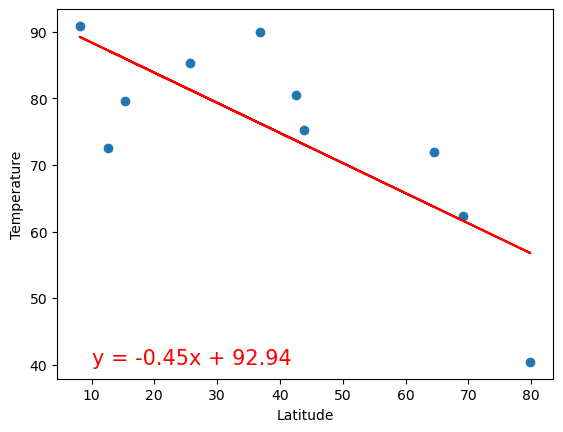

In [24]:
# Create a scatter plot of the x and y values

plt.scatter(lats, temps)

# Plot the regression line with the x-values and the 
# y coordinates based on the intercept and slope

plt.plot(lats, regress_values, "red")

# Annotate the text for the line equation and add its coordinates

plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.show()
